In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()

In [3]:
iris_data = pd.DataFrame({
    'Sepal length':iris.data[:,0],
    'Sepal width':iris.data[:,1],
    'Petal length':iris.data[:,2],
    'Petal width':iris.data[:,3],
    'class':iris.target
})

In [4]:
iris_data
# iris dataset link: https://github.com/dotnet/machinelearning/blob/main/test/data/iris.txt
# class 0 = Iris-setosa
# class 1 = Iris-versicolor
# calss 2 = Iris-virginica

,Sepal length,Sepal width,Petal length,Petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


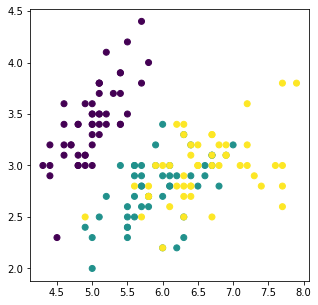

In [5]:
fig = plt.figure(figsize=(5,5))
plt.scatter(iris_data['Sepal length'],iris_data['Sepal width'],c=iris.target)

In [6]:
import torch
y_train = torch.from_numpy(np.array(iris_data['class']))
x_train = torch.from_numpy(np.array(iris_data.drop('class', axis=1)))

In [7]:
keyin = []
keyidx = []
for i in range(4):
    temp = input(iris_data.columns.values[i]+': ')
    if temp == '':
        continue
    keyidx.append(i)
    keyin.append(float(temp))
x_test = torch.from_numpy(np.array(keyin))
x_test = x_test.view(1, -1)
x_train = x_train[:, keyidx]

Sepal length: 6.7
Sepal width: 3.0
Petal length: 
Petal width: 


In [8]:
dists = x_train.new_zeros(x_train.shape[0], x_test.shape[0])
for i in range(x_train.shape[0]):
    temp = torch.sqrt(torch.sum((x_train[i]-x_test)**2, axis=1)) 
    dists[i]=temp

In [9]:
y_pred = torch.zeros(x_test.shape[0], dtype=torch.int64)
dists_topk=dists.clone()
dists_topk_values, dists_topk_idxs=torch.topk(dists_topk, k=5, largest=False, dim=0)
  
for i in range(dists_topk_idxs.shape[1]):
    result=[]
    for k in range(dists_topk_idxs.shape[0]):
        result.append(y_train[dists_topk_idxs[k][i]])
    y_pred[i] = max(set(result), key=result.count)
print(y_pred)

tensor([2])


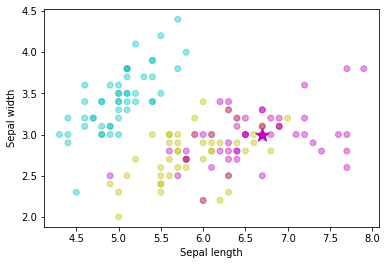

In [16]:
class_colors = ['c', 'y', 'm']
train_colors = [class_colors[c] for c in y_train]
test_colors = [class_colors[c] for c in y_pred]
plt.scatter(iris_data['Sepal length'],iris_data['Sepal width'],c=train_colors, alpha=0.4)
plt.scatter(x_test[:, 0], x_test[:, 1], color=test_colors, marker='*', s=200)
plt.xlabel(iris_data.columns.values[keyidx[0]])
plt.ylabel(iris_data.columns.values[keyidx[1]])
plt.show()